In [7]:
import tensorflow as tf
from keras.datasets import mnist
from keras import *


In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data (normalize pixel values to range [0, 1])
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [9]:
model = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),  # Replace with desired activation (relu or mish)
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
sample_images = test_images[:10]

# Calculate gradients using separate tf.GradientTape instances
relu_grads = []
mish_grads = []
for img in sample_images:
  # Create a new tape for each image and activation
  with tf.GradientTape() as tape:
    relu_output = model(tf.expand_dims(img, axis=0), training=False)
  relu_grads.append(tape.gradient(relu_output, model.trainable_variables)[0])

  with tf.GradientTape() as tape:
    mish_output = model(tf.expand_dims(img, axis=0), training=False)
  mish_grads.append(tape.gradient(mish_output, model.trainable_variables)[0])

<Figure size 640x480 with 0 Axes>

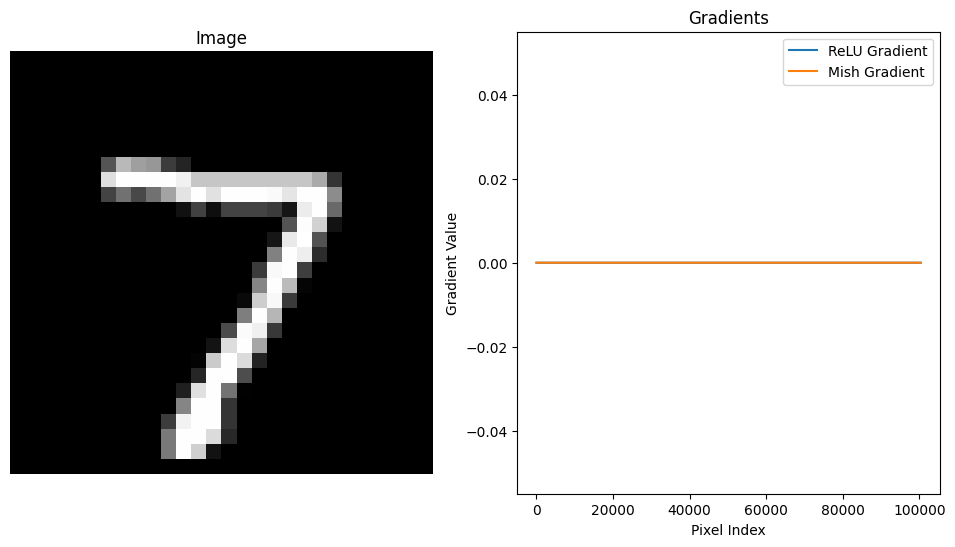

<Figure size 640x480 with 0 Axes>

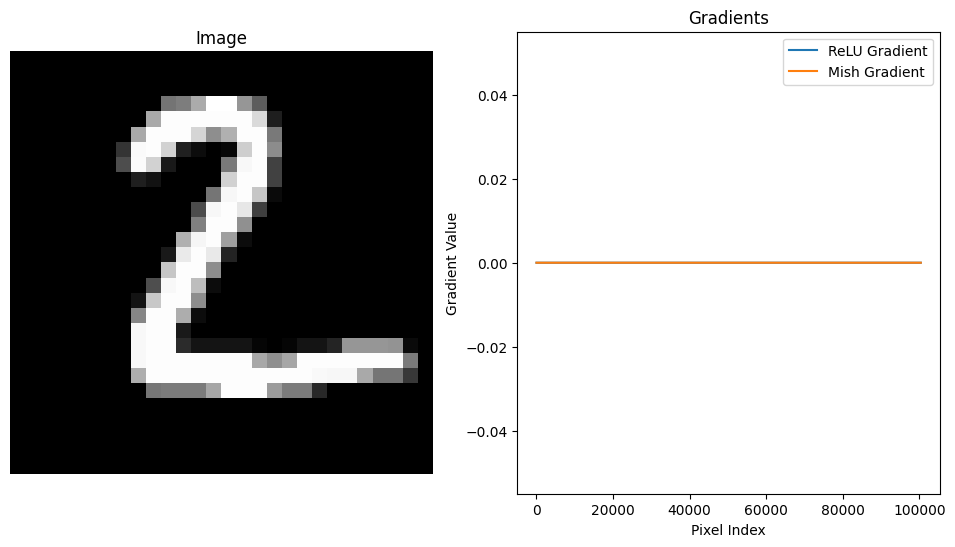

<Figure size 640x480 with 0 Axes>

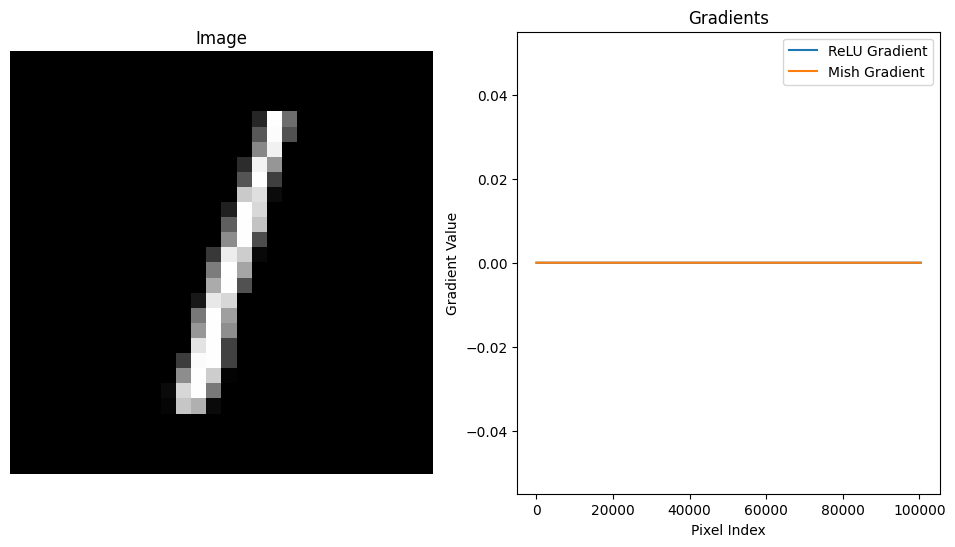

<Figure size 640x480 with 0 Axes>

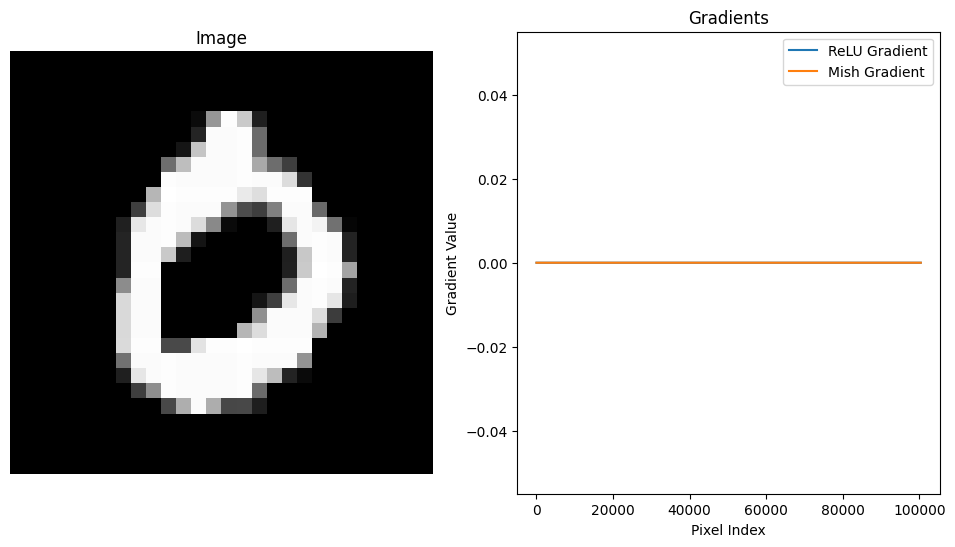

<Figure size 640x480 with 0 Axes>

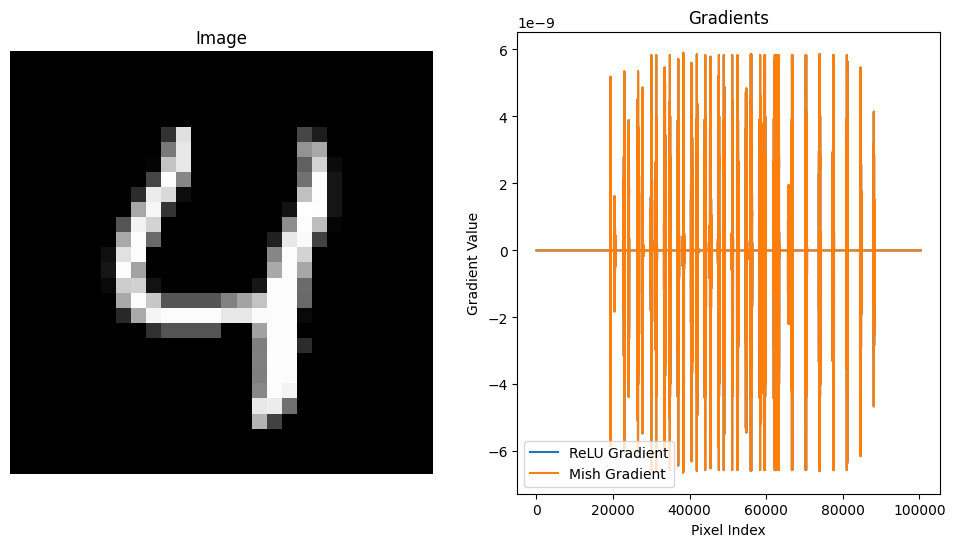

<Figure size 640x480 with 0 Axes>

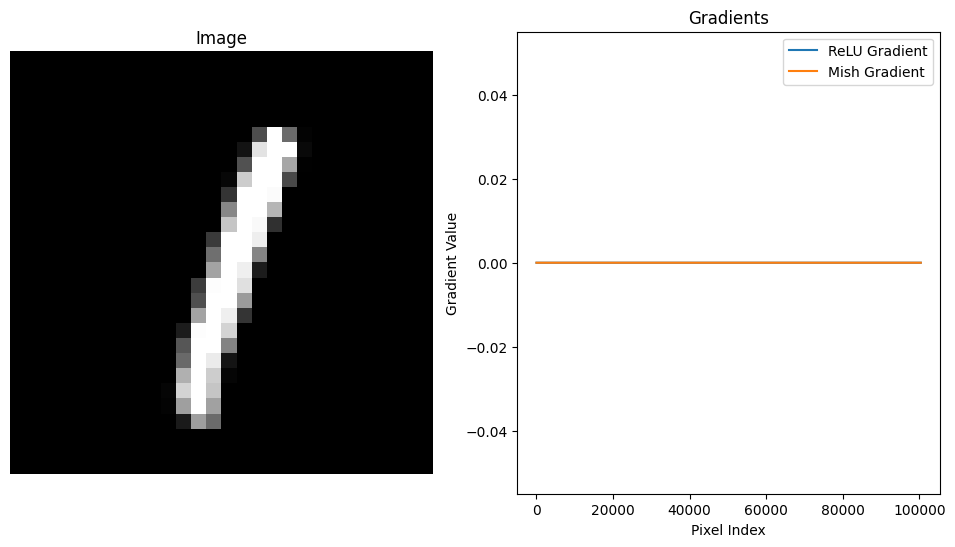

<Figure size 640x480 with 0 Axes>

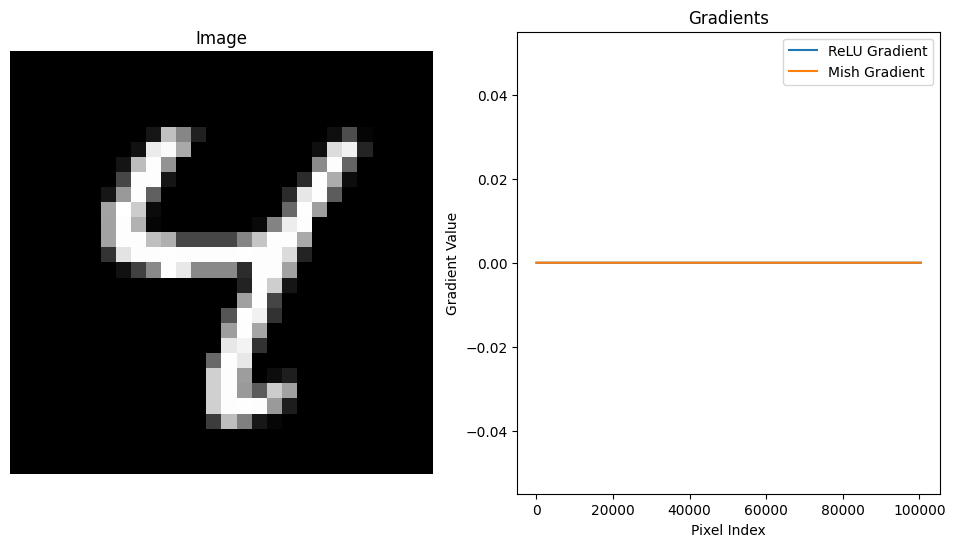

<Figure size 640x480 with 0 Axes>

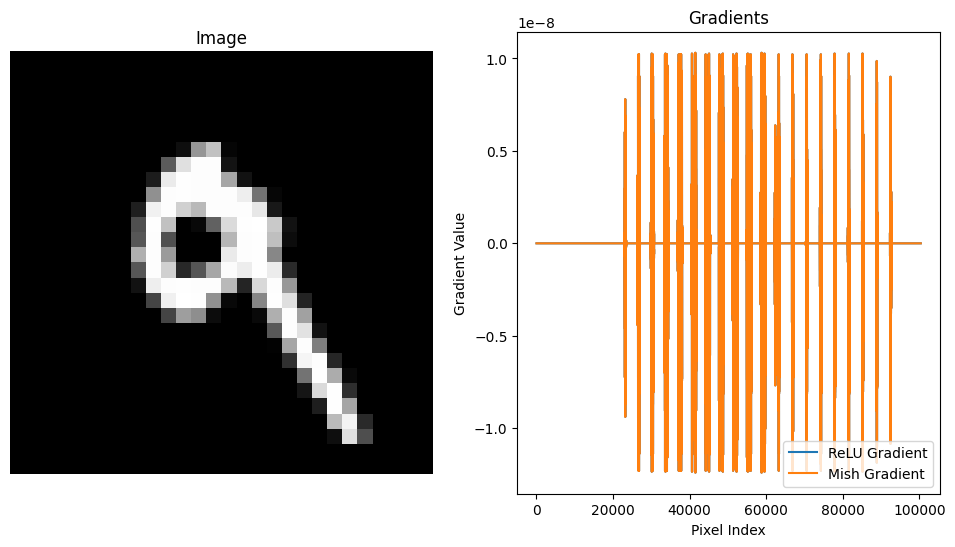

<Figure size 640x480 with 0 Axes>

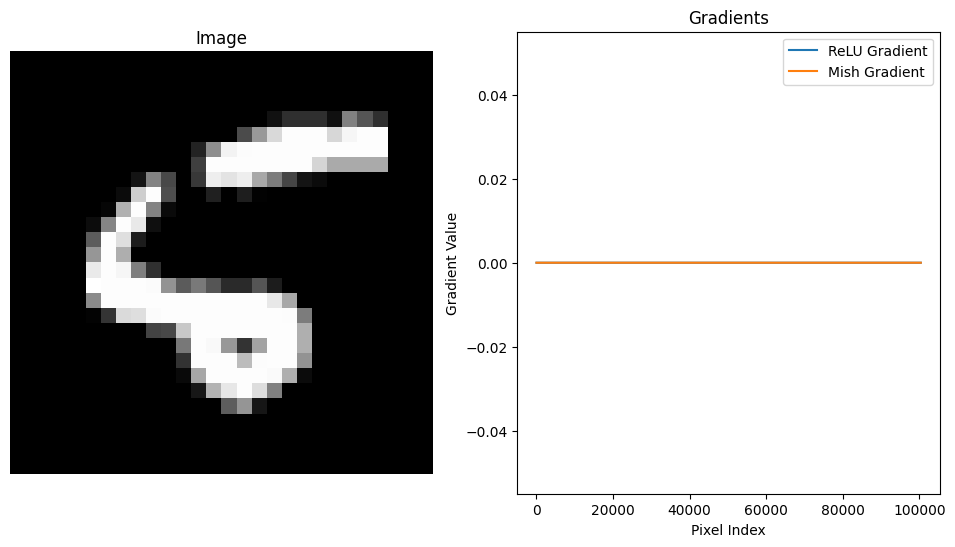

<Figure size 640x480 with 0 Axes>

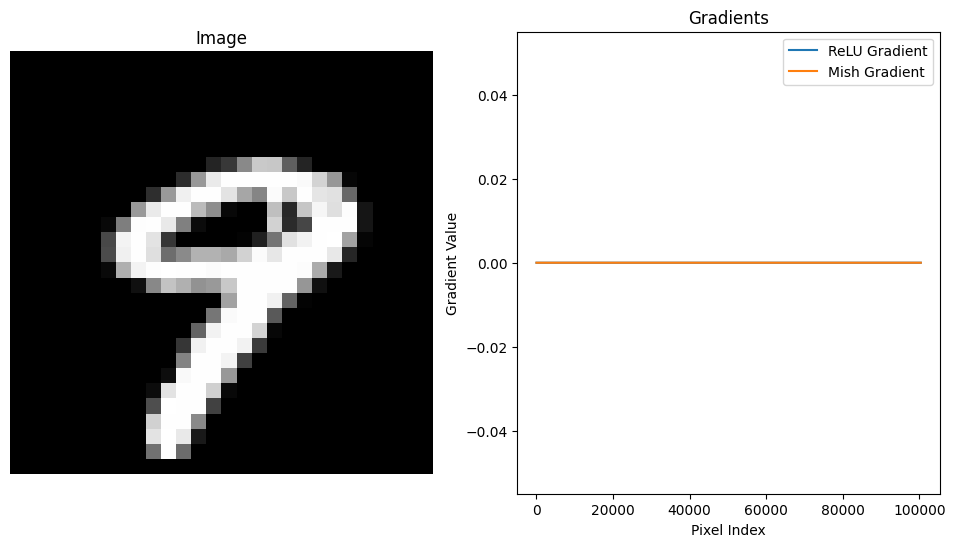

In [15]:
import matplotlib.pyplot as plt

# Function to plot gradients for a single image
def plot_gradients(image, relu_grad, mish_grad):
  plt.figure(figsize=(12, 6))

  # Flatten gradients
  relu_grad_flat = relu_grad.numpy().ravel()
  mish_grad_flat = mish_grad.numpy().ravel()

  # Plot image
  plt.subplot(121)
  plt.imshow(image, cmap='gray')
  plt.title('Image')
  plt.axis('off')

  # Plot gradients
  plt.subplot(122)
  plt.plot(relu_grad_flat, label='ReLU Gradient')
  plt.plot(mish_grad_flat, label='Mish Gradient')
  plt.legend()
  plt.title('Gradients')
  plt.xlabel('Pixel Index')
  plt.ylabel('Gradient Value')

# Plot gradients for each sample image
for i, (image, relu_grad, mish_grad) in enumerate(zip(sample_images, relu_grads, mish_grads)):
  plt.suptitle(f"Sample Image {i+1}")
  plot_gradients(image, relu_grad, mish_grad)
  plt.show()


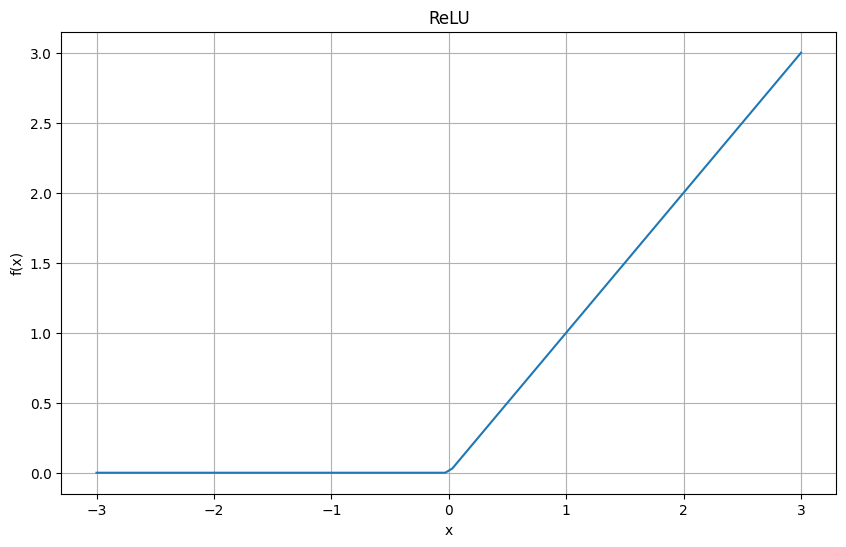

In [84]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 100)

def relu(x):
  return np.maximum(0, x)

def mish(x):
  return x * np.tanh(np.log1p(np.exp(x)))

# Generate ReLU and Mish outputs
relu_y = relu(x)
mish_y = mish(x)

# Plot the landscapes
plt.figure(figsize=(10, 6))

plt.plot(x, relu_y, label='ReLU')
# plt.plot(x, mish_y, label='Mish')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('ReLU')

plt.grid(True)

plt.show()

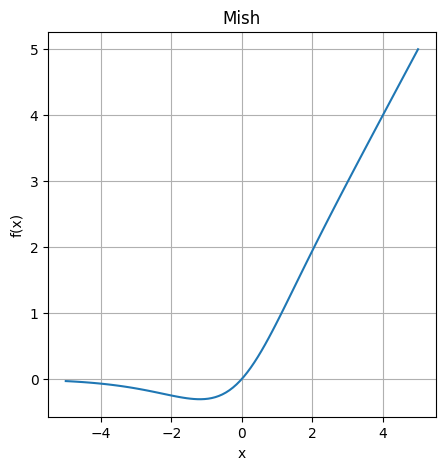

In [82]:
plt.plot(x, mish_y, label='Mish')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Mish')
plt.grid(True)

plt.show()

In [15]:
import matplotlib.pyplot as plt
import random


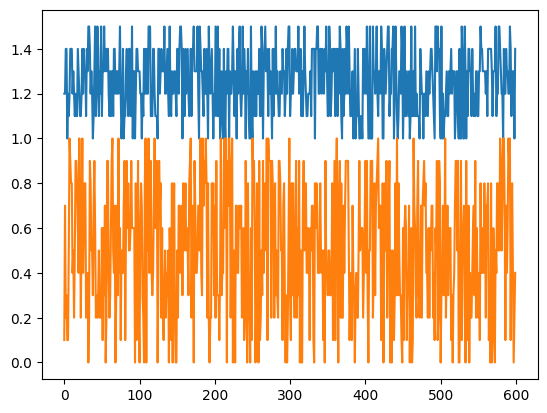

In [35]:
ssd,yolo,n=[],[],10*60
for i in range(n):
    ssd.append(round(random.uniform(1.0,1.5),1))
    yolo.append(round(random.random(),1))
plt.plot([i for i in range(n)],ssd)
plt.plot([i for i in range(n)],yolo)

In [48]:
ssd = [(1,1.5),(1.5,2.5),(2.5,3)]
yolo = [(0,0.15),(0.15,0.75),(0.75,1)]
n=900
def x(l:list[tuple]):
    start,mid,end=[],[],[]
    n=300
    for i in range(n):
        start.append(round(random.uniform(l[0][0],l[0][1]),1))
        mid.append(round(random.uniform(l[1][0],l[1][1]),1))
        end.append(round(random.uniform(l[2][0],l[2][1]),1))
    return start+mid+end

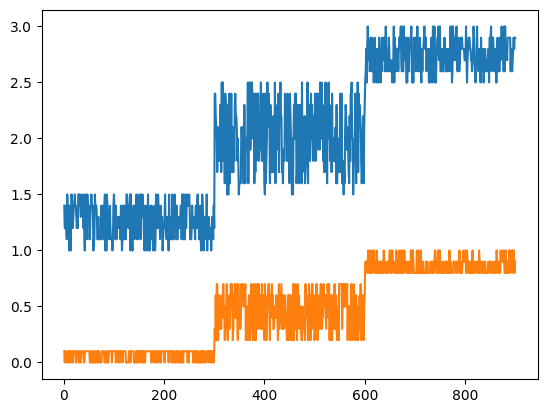

In [52]:
n=[_ for _ in range(1, 900+1)]
plt.plot(n,x(ssd))
plt.plot(n,x(yolo))

(1.64, 0.66)

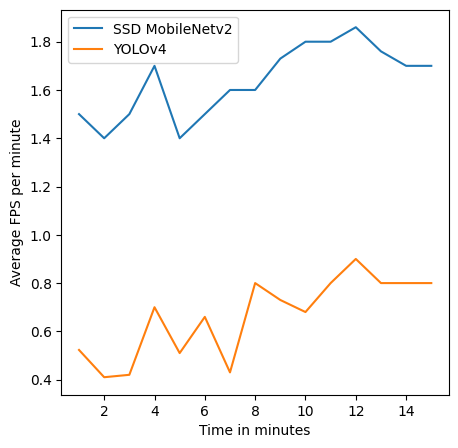

In [80]:
ssd = [1.5,1.4,1.5,1.7,1.4,1.5,1.6,1.6,1.73,1.8,1.8,1.86,1.76,1.7,1.7]
yolo = [0.523,0.41,0.42,0.7,0.51,0.66,0.43,0.8,0.73,0.68,0.8,0.9,0.8,0.8,0.8]
n=[_ for _ in range(1,16)]
plt.rcParams['figure.figsize']=(5,5)
plt.plot(n,ssd,label="SSD MobileNetv2")
plt.plot(n,yolo,label="YOLOv4")
plt.legend()
plt.xlabel("Time in minutes")
plt.ylabel("Average FPS per minute")
round(sum(ssd)/15,2),round(sum(yolo)/15,2)